# Урок 4. Визуальный анализ данных
## Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать данные по ссылке 
https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

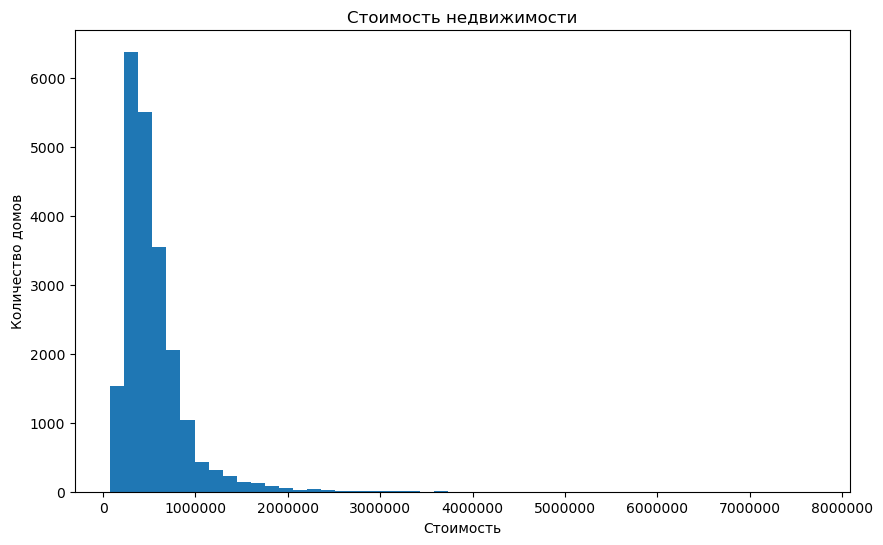

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50)
plt.ticklabel_format(style='plain')
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов');

Как видно основная масса домов стоит до миллиона, но есть выбросы до 8ми

### 1.3 Изучите распределение квадратуры жилой

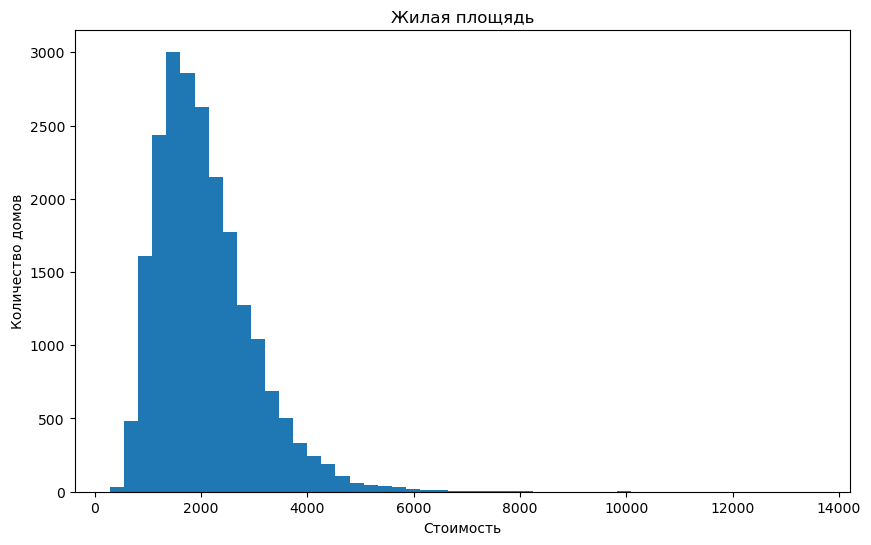

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['sqft_living'], bins=50)
plt.ticklabel_format(style='plain')
plt.title('Жилая площядь')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов');

Основная масса домов с площядью до 4000 кв. футов, но есть выбросы до 14000

### 1.4 Изучите распределение года постройки

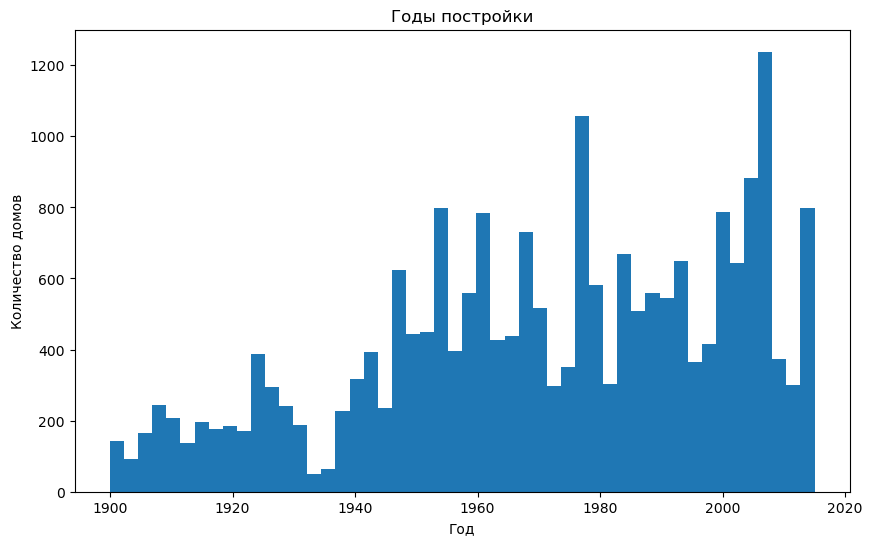

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['yr_built'], bins=50)
plt.ticklabel_format(style='plain')
plt.title('Годы постройки')
plt.xlabel('Год')
plt.ylabel('Количество домов');

Видно что дома постепенно обновляются более новых больше чем старых, четко видны провалы в количестве построенных домов во времена кризисов 1930тых, 1970тых, 2008года.

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

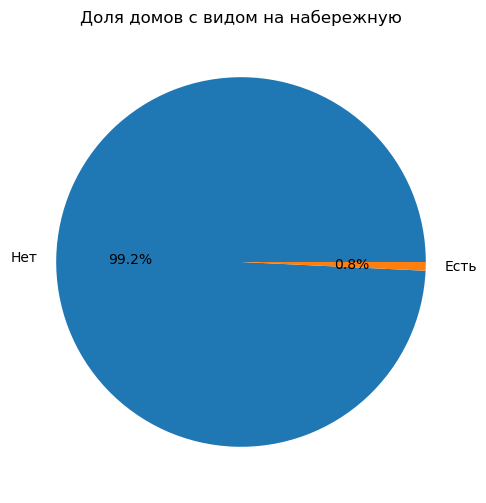

In [12]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(data, autopct='%1.1f%%', labels=['Нет','Есть'])
plt.title('Доля домов с видом на набережную');

Домов с видом на набережную всего 0,8 процента от общего количества

### 2.2 Изучите распределение этажей домов

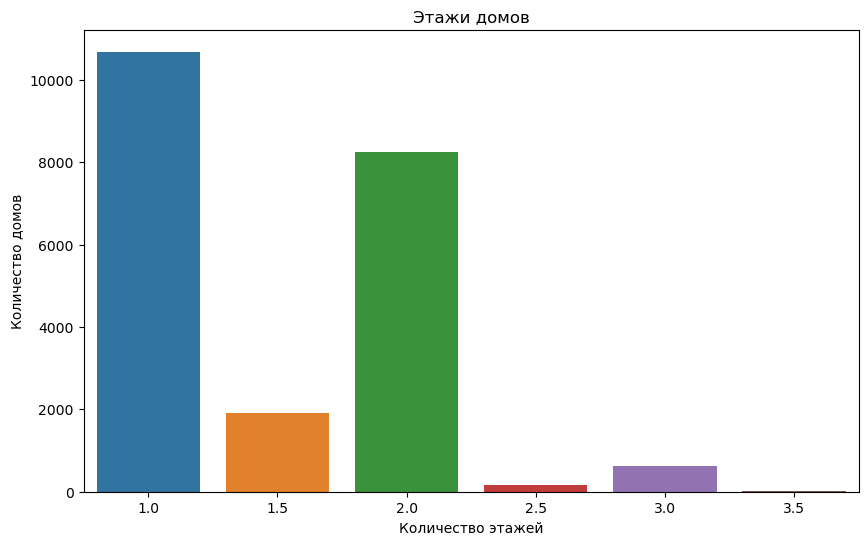

In [13]:
data = df['floors'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x = data.index, y = data)
plt.title('Этажи домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

В основном дома 1 и 2х этажные. 

### 2.3 Изучите распределение состояния домов

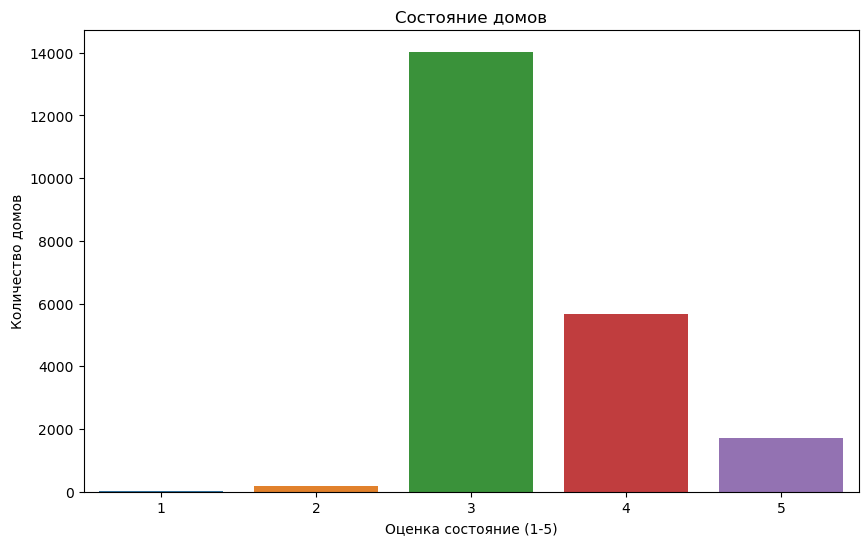

In [14]:
data = df['condition'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x = data.index, y = data)
plt.title('Состояние домов')
plt.xlabel('Оценка состояние (1-5)')
plt.ylabel('Количество домов');

Очень мало домов в плохом состоянии, проводятся капремонты, основная масса в среднем и хорошем состоянии.

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

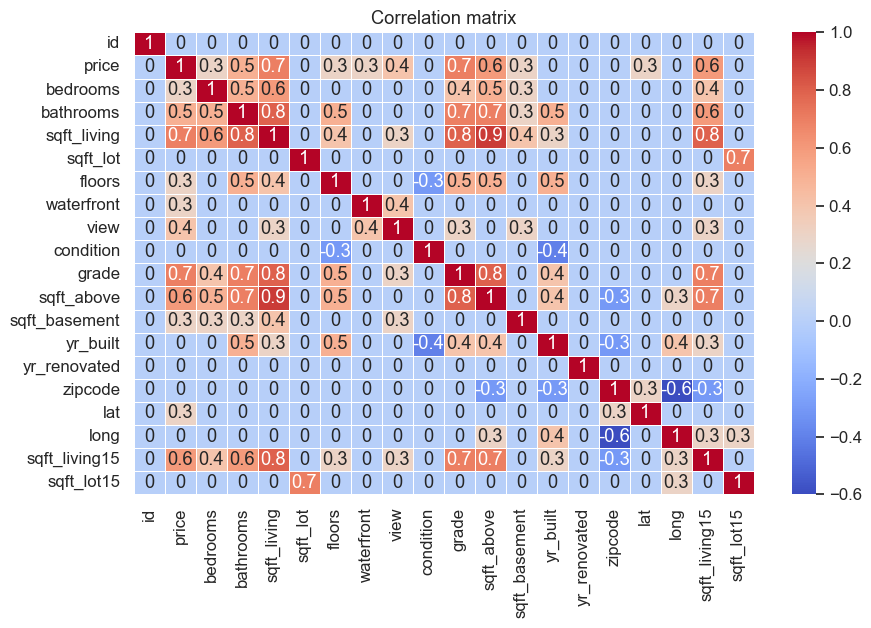

In [18]:
# Посмотрим зависимости в данных

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

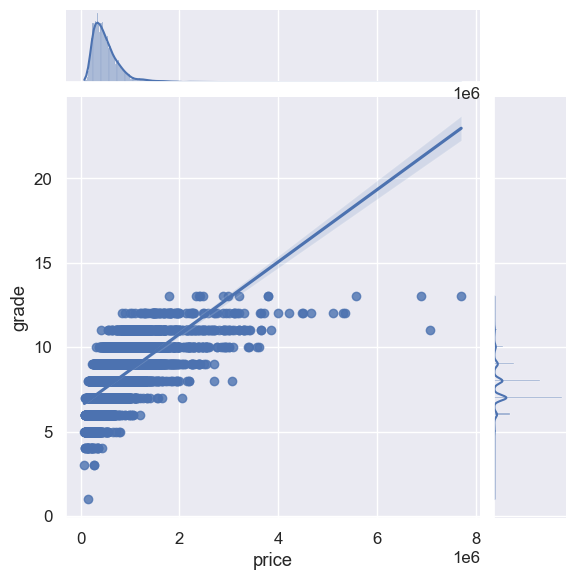

In [19]:
# Как видно, цена зависит от площяди, оценки конструкции и дизайна. Количество комнат от площади, 
# видно что дома строятся районами так как близлещашие дома явно имеют похожие пареметры площядей и оценки дизайна.
# Рассмотрим более внимательно распределение оценки контструкции и дизайна от цены:

sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

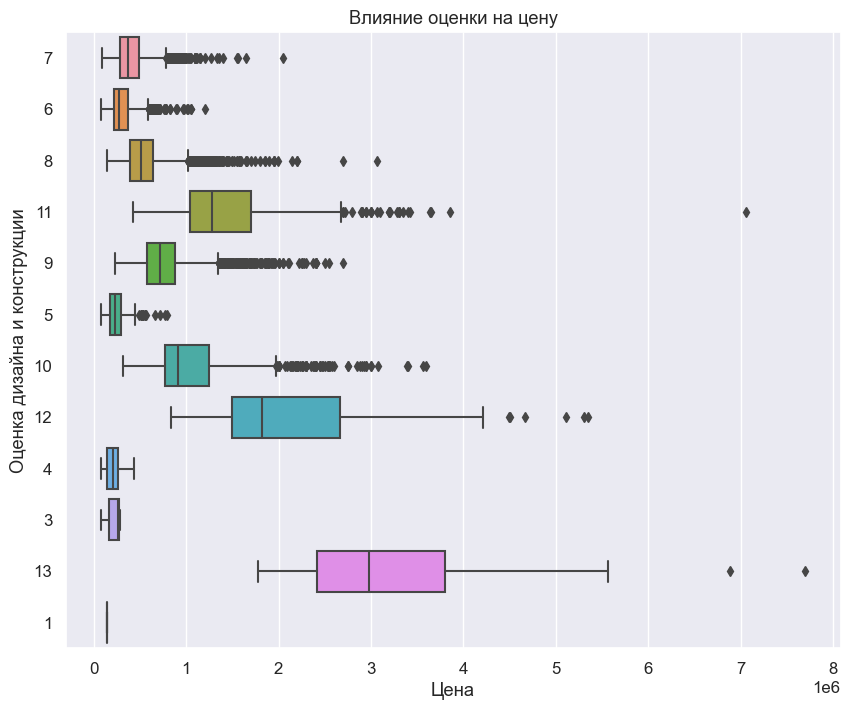

In [28]:
# Изучим влияние разных факторов на стоимость дома
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)
plt.xlabel('Цена')
plt.ylabel('Оценка дизайна и конструкции')
plt.title('Влияние оценки на цену');

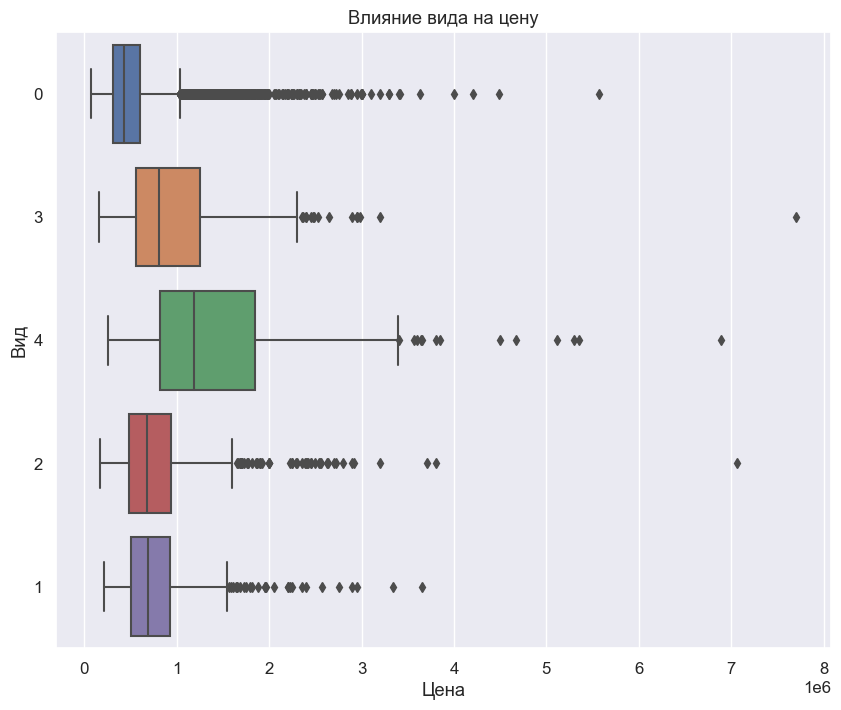

In [29]:
# Явно видно дома с высокой оценкой стоят дороже

# Посмотрим как вид влияет на цену

plt.figure(figsize=(10, 8))
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5)
plt.xlabel('Цена')
plt.ylabel('Вид')
plt.title('Влияние вида на цену');

<Figure size 1000x800 with 0 Axes>

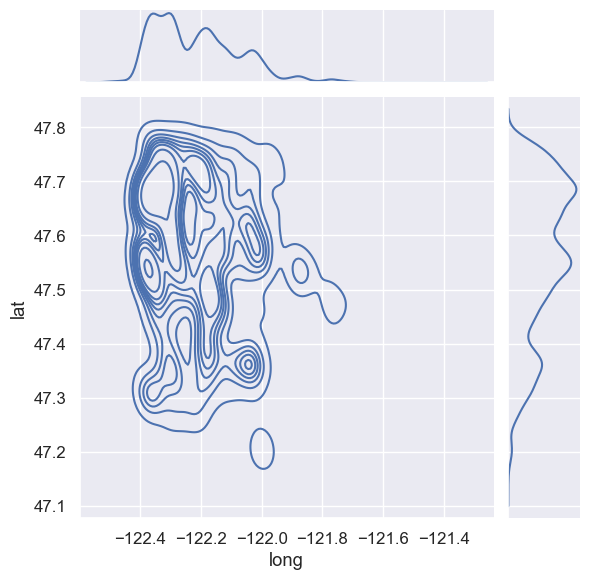

In [26]:
# Как видно, с более лучшим видом дома стоят дороже, но есть дома за доступную цену с хорошей оценкой вида, 
# то есть зависимость не слишком выращенная.

# Посмотрим распределение широты и долготы

plt.figure(figsize=(10, 8))
sns.jointplot(x=df['long'], y=df['lat'], kind='kde');

In [36]:
# Видно что дома распределены более-менее равномерно между широтами -122.4 и -122 и долготой от 47.3 до 47.8

# Посмотрим как дома выглядят на карте:

import folium
map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.lat, point.long],
        radius=2,
        popup=point.price
    ).add_to(map)
    
df.apply(plotDot, axis=1)

map.fit_bounds(map.get_bounds())

map 

In [35]:
# Видно как дома расположены на карте Сиэтла.